In [1]:
import time
s_time = time.time()
import pandas as pd 
import numpy as np 
df1=pd.read_csv('./data-set/tmdb_5000_credits.csv')
df2=pd.read_csv('./data-set/tmdb_5000_movies.csv')

In [2]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [3]:
from ast import literal_eval
# df2 = df2.drop('title',axis=1)
# df2.cast[0][:100]
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


#Demographic Filtering

In [4]:
C = df2['vote_average'].agg('mean')
C

6.092171559442011

In [5]:
m = df2['vote_count'].quantile(.9)
m

1838.4000000000015

In [6]:
# Qualified movie
q_movie = df2.loc[df2['vote_count'] >= m]
q_movie.shape

(481, 23)

In [7]:
def weighted_rating(x, m=m, C=C):
    v=x['vote_count']
    R=x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(v+m) *C)

In [8]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movie['score'] = q_movie.apply(weighted_rating, axis=1)
# q_movie[{"score": q_movie.apply(weighted_rating, axis=1)}]
q_movie.shape

/Users/kiora-mediajava/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(481, 24)

In [9]:
q_movie = q_movie.sort_values('score', ascending=False)
q_movie[['title', 'vote_count', 'vote_average', 'score']].head(10)
# q_movie[q_movie['title'] == 'The Shawshank Redemption']

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


In [10]:
q_movie.sort_values('popularity', ascending=False).head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew,score
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,Minions,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",6.311706
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,Interstellar,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.809479


546                    Minions
95                Interstellar
788                   Deadpool
94     Guardians of the Galaxy
127         Mad Max: Fury Road
28              Jurassic World
Name: title, dtype: object


Text(0.5, 1.0, 'Popular Movies')

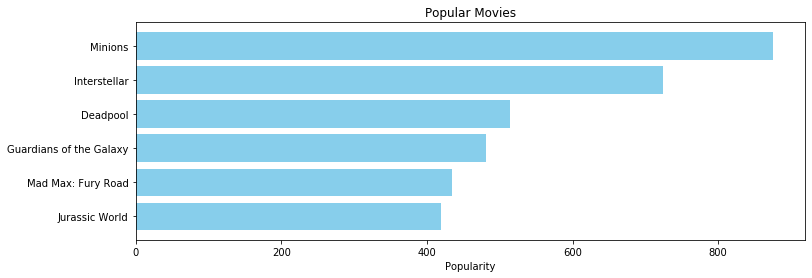

In [11]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
print(pop['title'].head(6))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

#Content Based Filtering

In [12]:
df2['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [13]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

tfidf_matrix.shape

(4803, 20978)

In [14]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

In [15]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [16]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [17]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [18]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(lambda x: literal_eval(str(x)))


In [19]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [20]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [21]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [22]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [23]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [24]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [25]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [26]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])
print(count_matrix.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [28]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [29]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [30]:
from random import randint
df3=pd.read_csv('./data-set/ratings_small.csv')
df3['rating'] = df3['rating'].apply(lambda x: randint(0,10))
df3 = df3.rename(columns={'userId': 'zoneId'})
df3.tail()

,zoneId,movieId,rating,timestamp
99999,671,6268,3,1065579370
100000,671,6269,9,1065149201
100001,671,6365,7,1070940363
100002,671,6385,8,1070979663
100003,671,6565,7,1074784724


In [31]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
data = Dataset.load_from_df(df3[['zoneId', 'movieId', 'rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.3284  3.3303  3.3290  3.3070  3.3460  3.3281  0.0124  
MAE (testset)     2.8336  2.8333  2.8324  2.8214  2.8504  2.8342  0.0093  
Fit time          5.58    5.63    5.73    5.78    6.35    5.81    0.28    
Test time         0.16    0.23    0.16    0.27    0.16    0.19    0.05    


{'test_rmse': array([3.32837599, 3.33025168, 3.32901769, 3.30699068, 3.34596672]),
 'test_mae': array([2.83361763, 2.83328399, 2.8324147 , 2.82138213, 2.85041704]),
 'fit_time': (5.581065893173218,
  5.6282057762146,
  5.725109577178955,
  5.778394937515259,
  6.348206996917725),
 'test_time': (0.15674877166748047,
  0.22809481620788574,
  0.15700721740722656,
  0.27224016189575195,
  0.15682506561279297)}

In [32]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [33]:
df3[df3['zoneId'] == 1]

,zoneId,movieId,rating,timestamp
0,1,31,1,1260759144
1,1,1029,4,1260759179
2,1,1061,5,1260759182
3,1,1129,9,1260759185
4,1,1172,10,1260759205
5,1,1263,0,1260759151
6,1,1287,4,1260759187
7,1,1293,9,1260759148
8,1,1339,4,1260759125
9,1,1343,3,1260759131


In [34]:
svd.predict(1, 1293, 3)

Prediction(uid=1, iid=1293, r_ui=3, est=5, details={'was_impossible': False})

In [35]:
def getCollaborativeFilter(zoneId=1):
    l1 = list()
    for i in range(1, 4803):
        l1.append(svd.predict(zoneId, i, 3, clip=False))

    l1.sort(key=lambda x: x.est, reverse=True)
    l2 = l1[0:11]
    l2 = [i.iid for i in l2]
    return df2['title'].iloc[l2]

In [36]:
for i in range(1,672):
    print("==========Zone-"+str(i)+"============")
    print(getCollaborativeFilter(i))

==========Zone-1============
1405                        The Pianist
2                               Spectre
36      Transformers: Age of Extinction
1129             The Mothman Prophecies
2000                  Anywhere But Here
595                                Doom
1172                        Eight Below
344                         Unstoppable
497                          Red Dragon
4641        I Married a Strange Person!
3083                  While We're Young
Name: title, dtype: object
==========Zone-2============
474                                   Evolution
2000                          Anywhere But Here
39                                 TRON: Legacy
587                                   The Abyss
153        Mission: Impossible - Ghost Protocol
745     Miss Congeniality 2: Armed and Fabulous
225                                 Speed Racer
165                                        Hulk
2355                    I Love You, Beth Cooper
21                                   Robin 

778                                     Meet Dave
3948                                     Creature
19      The Hobbit: The Battle of the Five Armies
145                                          Troy
1093                                  Deep Rising
1179                              I Love You, Man
1262                                        Alfie
163                                      Watchmen
968                             Murder by Numbers
141                               Mars Needs Moms
261                         Live Free or Die Hard
Name: title, dtype: object
==========Zone-20============
1198         Escape from Planet Earth
912        Interview with the Vampire
497                        Red Dragon
272                    Town & Country
380                    Cinderella Man
671                           Everest
1270    Universal Soldier: The Return
95                       Interstellar
2000                Anywhere But Here
32                Alice in Wonderland
2908         

912             Interview with the Vampire
1196                          The Prestige
2997                               The Boy
586                      The Monuments Men
733                    Up Close & Personal
2858        The Postman Always Rings Twice
2329                            Prom Night
3481                            Miss March
4011    Halloween III: Season of the Witch
2571                The Remains of the Day
3147                               Re-Kill
Name: title, dtype: object
==========Zone-38============
3578                              House Party 2
2058                                      Stone
1339                                Blue Streak
2640    Things to Do in Denver When You're Dead
2542              What's Love Got to Do with It
552                                Funny People
1682                              Sausage Party
2092                              Wayne's World
367                             The Interpreter
1909                                  

1088                      The Producers
3175                    Black Christmas
2355            I Love You, Beth Cooper
3897    Martin Lawrence Live: Runteldat
4025                         Religulous
1293                      Frankenweenie
2858     The Postman Always Rings Twice
1201                          Predators
10                     Superman Returns
1917                             The 33
586                   The Monuments Men
Name: title, dtype: object
==========Zone-55============
719                          This Is It
788                            Deadpool
1220                                8MM
737           Jack Ryan: Shadow Recruit
6                               Tangled
370                    Now You See Me 2
1230                         The Shadow
2134          This Is Where I Leave You
588     Wall Street: Money Never Sleeps
3175                    Black Christmas
204                           Fast Five
Name: title, dtype: object
==========Zone-56============
2947  

3751       What the #$*! Do We (K)now!?
3175                    Black Christmas
457               Six Days Seven Nights
1200               The Living Daylights
1193          The Count of Monte Cristo
4246                            Trucker
788                            Deadpool
1293                      Frankenweenie
36      Transformers: Age of Extinction
541                             Soldier
1747                 A Passage to India
Name: title, dtype: object
==========Zone-73============
3793               The Velocity of Gary
1288                      The Last Shot
260                        Ender's Game
2617                            Peeples
1197                  Horrible Bosses 2
2100                      Mortal Kombat
34                  Monsters University
2394                             Wolves
2139                      Scary Movie 5
1916                   Lords of Dogtown
2144    A Very Harold & Kumar Christmas
Name: title, dtype: object
==========Zone-74============
1090  

36      Transformers: Age of Extinction
858                 Muppets Most Wanted
1573                      Four Brothers
2797             Lars and the Real Girl
3039               My Week with Marilyn
1608                    The Running Man
1097                        Big Trouble
1527                 Mr. Holland's Opus
1089                        The Phantom
2082                         The Beaver
595                                Doom
Name: title, dtype: object
==========Zone-91============
2502                                          Zulu
3996                               A Guy Named Joe
1265                                    FearDotCom
3543                               Rang De Basanti
4306                            Pink Ribbons, Inc.
588                Wall Street: Money Never Sleeps
2268    Three Kingdoms: Resurrection of the Dragon
318                                      Surf's Up
2959                            Machine Gun McCain
110                                   Pearl 

47                            Star Trek Into Darkness
16                                       The Avengers
529                                  Tears of the Sun
329     The Lord of the Rings: The Return of the King
1784                   Ever After: A Cinderella Story
2174                                Under the Rainbow
555                                    Dr. Dolittle 2
2628                              Blood and Chocolate
1292                                Because I Said So
481                      Looney Tunes: Back in Action
5                                        Spider-Man 3
Name: title, dtype: object
==========Zone-110============
1073                        The River Wild
145                                   Troy
2273                        Hands of Stone
39                            TRON: Legacy
733                    Up Close & Personal
2997                               The Boy
185                      War of the Worlds
445                        Just Go with It
2916

1777             Paul Blart: Mall Cop
2987                 The Mighty Ducks
2139                    Scary Movie 5
1682                    Sausage Party
903                               Ted
1997                              Her
508     The Lost World: Jurassic Park
1223                       Hanging Up
480                 Battlefield Earth
1485                      The Watcher
661        Zathura: A Space Adventure
Name: title, dtype: object
==========Zone-131============
1994            The Ides of March
1923                    Stop-Loss
2724                     Downfall
1544       Extraordinary Measures
47        Star Trek Into Darkness
1176                          Ray
3967          Four Single Fathers
2987             The Mighty Ducks
2134    This Is Where I Leave You
2617                      Peeples
380                Cinderella Man
Name: title, dtype: object
==========Zone-132============
2                    Spectre
296              End of Days
3396        Hard to Be a God
1136 

590                                     The Siege
1580                                  The Nut Job
260                                  Ender's Game
543                                    Monkeybone
19      The Hobbit: The Battle of the Five Armies
736                 Under Siege 2: Dark Territory
2890                                Critical Care
3                           The Dark Knight Rises
2193                         Secret in Their Eyes
2011                                        Cheri
2355                      I Love You, Beth Cooper
Name: title, dtype: object
==========Zone-147============
111                            Transformers
296                             End of Days
50      Prince of Persia: The Sands of Time
1641                    The Whole Ten Yards
2123                              Spotlight
2134              This Is Where I Leave You
3424            The Adventures of Huck Finn
3155                            Melancholia
2000                      Anywhere But H

1214             Ri¢hie Ri¢h
2078              Swing Vote
1376                In & Out
592     Seven Years in Tibet
1307           The Hurricane
2053             Joyeux Noël
2881        The Great Beauty
3386            The Visitors
1265              FearDotCom
2002                 Haywire
3147                 Re-Kill
Name: title, dtype: object
==========Zone-168============
2959              Machine Gun McCain
3751    What the #$*! Do We (K)now!?
1214                     Ri¢hie Ri¢h
296                      End of Days
1073                  The River Wild
1923                       Stop-Loss
2028                      Son of God
288      The Hunchback of Notre Dame
553                      The Kingdom
198                         R.I.P.D.
1293                   Frankenweenie
Name: title, dtype: object
==========Zone-169============
4226                              Nine Queens
1466                      Unfinished Business
858                       Muppets Most Wanted
2712                

454     The Day the Earth Stood Still
500                  2 Fast 2 Furious
231                    Monsters, Inc.
256                         Allegiant
924                      The Ring Two
288       The Hunchback of Notre Dame
337            A Good Day to Die Hard
586                 The Monuments Men
3751     What the #$*! Do We (K)now!?
2657                Shinjuku Incident
3175                  Black Christmas
Name: title, dtype: object
==========Zone-185============
3751                 What the #$*! Do We (K)now!?
2657                            Shinjuku Incident
1278                                   The Gunman
597                         Underworld: Awakening
2384                                       Carlos
4306                           Pink Ribbons, Inc.
2193                         Secret in Their Eyes
1291                     The Time Traveler's Wife
4016                                 Garden State
317                            The Flowers of War
172     The Twilight Sag

2968                             In the Land of Women
1230                                       The Shadow
2918                               Jackass Number Two
1356                                     The Hangover
1610                                            Hanna
3147                                          Re-Kill
329     The Lord of the Rings: The Return of the King
597                             Underworld: Awakening
3101                                      The Swindle
2739                       10 Things I Hate About You
3006                         Twilight Zone: The Movie
Name: title, dtype: object
==========Zone-203============
4085    The Triplets of Belleville
2012                   Vanity Fair
1097                   Big Trouble
866             Bullet to the Head
750                  State of Play
2186               The Kite Runner
1556                  Mystic River
1269             Raise the Titanic
141                Mars Needs Moms
1994             The Ides of Marc

260                                    Ender's Game
1089                                    The Phantom
36                  Transformers: Age of Extinction
158                                       Star Trek
223                       The Chronicles of Riddick
35              Transformers: Revenge of the Fallen
253                          300: Rise of an Empire
17      Pirates of the Caribbean: On Stranger Tides
348                  Ice Age: Dawn of the Dinosaurs
608                                Basic Instinct 2
3039                           My Week with Marilyn
Name: title, dtype: object
==========Zone-225============
589                            Dracula Untold
296                               End of Days
1358    Austin Powers: The Spy Who Shagged Me
344                               Unstoppable
2000                        Anywhere But Here
3753                                  Boyhood
47                    Star Trek Into Darkness
356                           Sherlock Holmes
38

1265                                  FearDotCom
2791                                        Womb
3578                               House Party 2
1197                           Horrible Bosses 2
318                                    Surf's Up
551                                  Fool's Gold
1       Pirates of the Caribbean: At World's End
587                                    The Abyss
261                        Live Free or Die Hard
497                                   Red Dragon
357                                      Ben-Hur
Name: title, dtype: object
==========Zone-242============
509                        Madagascar
2329                       Prom Night
3481                       Miss March
3176           Breakin' All the Rules
454     The Day the Earth Stood Still
3543                  Rang De Basanti
924                      The Ring Two
2174                Under the Rainbow
508     The Lost World: Jurassic Park
415                             Dredd
1610                   

Name: title, dtype: object
==========Zone-259============
2599                         De-Lovely
260                       Ender's Game
3996                   A Guy Named Joe
597              Underworld: Awakening
1088                     The Producers
2858    The Postman Always Rings Twice
3160                      The Runaways
2736                        Young Guns
3671                       Yoga Hosers
899                              Shrek
4085        The Triplets of Belleville
Name: title, dtype: object
==========Zone-260============
367        The Interpreter
1196          The Prestige
318              Surf's Up
2011                 Cheri
260           Ender's Game
3578         House Party 2
4370          Brigham City
2959    Machine Gun McCain
1265            FearDotCom
1610                 Hanna
173         Happy Feet Two
Name: title, dtype: object
==========Zone-261============
318                          Surf's Up
2174                 Under the Rainbow
2858    The Postman Al

356                               Sherlock Holmes
2804                                  Casino Jack
1485                                  The Watcher
1747                           A Passage to India
19      The Hobbit: The Battle of the Five Armies
1129                       The Mothman Prophecies
592                          Seven Years in Tibet
70                                 Wild Wild West
1272                                     Impostor
1291                     The Time Traveler's Wife
2000                            Anywhere But Here
Name: title, dtype: object
==========Zone-277============
10                           Superman Returns
2657                        Shinjuku Incident
2628                      Blood and Chocolate
1270            Universal Soldier: The Return
1968    I Still Know What You Did Last Summer
3147                                  Re-Kill
594                               Bad Company
1527                       Mr. Holland's Opus
2716                    

3114                            Elsa & Fred
497                              Red Dragon
95                             Interstellar
786                       The Monkey King 2
50      Prince of Persia: The Sands of Time
4641            I Married a Strange Person!
750                           State of Play
3753                                Boyhood
832                       Death Becomes Her
112                               Alexander
2699                               Fun Size
Name: title, dtype: object
==========Zone-296============
4641       I Married a Strange Person!
1370                                21
1617                                 9
1089                       The Phantom
1909                            Legend
377                    The Devil's Own
1625                        Virtuosity
833                      Shanghai Noon
231                     Monsters, Inc.
3565    The Return of the Pink Panther
252                   The Green Hornet
Name: title, dtype: object
==

454           The Day the Earth Stood Still
552                            Funny People
261                   Live Free or Die Hard
50      Prince of Persia: The Sands of Time
2890                          Critical Care
1292                      Because I Said So
380                          Cinderella Man
163                                Watchmen
3543                        Rang De Basanti
736           Under Siege 2: Dark Territory
2353                        Life as a House
Name: title, dtype: object
==========Zone-318============
553                        The Kingdom
2858    The Postman Always Rings Twice
1499                       Bridesmaids
608                   Basic Instinct 2
2987                  The Mighty Ducks
2797            Lars and the Real Girl
1356                      The Hangover
1230                        The Shadow
2000                 Anywhere But Here
342                       Men in Black
1089                       The Phantom
Name: title, dtype: object
==

2959    Machine Gun McCain
1287    A Monster in Paris
344            Unstoppable
1293         Frankenweenie
1220                   8MM
3578         House Party 2
922                Knowing
4370          Brigham City
5             Spider-Man 3
2064             Underdogs
370       Now You See Me 2
Name: title, dtype: object
==========Zone-336============
904             As Good as It Gets
1544        Extraordinary Measures
922                        Knowing
2011                         Cheri
1028                       Solaris
24                       King Kong
3481                    Miss March
370               Now You See Me 2
1196                  The Prestige
912     Interview with the Vampire
919                        Payback
Name: title, dtype: object
==========Zone-337============
260                   Ender's Game
2167                         Nerve
527                        Be Cool
480              Battlefield Earth
1200          The Living Daylights
589                 Dracula

733          Up Close & Personal
1222                    Sex Tape
1682               Sausage Party
382                   Seabiscuit
1722                Dracula 2000
24                     King Kong
342                 Men in Black
799     Resident Evil: Afterlife
292                       Eragon
110                 Pearl Harbor
1246           Quest for Camelot
Name: title, dtype: object
==========Zone-357============
344                                       Unstoppable
223                         The Chronicles of Riddick
329     The Lord of the Rings: The Return of the King
1639                                       88 Minutes
32                                Alice in Wonderland
1088                                    The Producers
6                                             Tangled
2                                             Spectre
1693                                   Seed of Chucky
163                                          Watchmen
3751                     What the #$*! 

593                   The Dilemma
783                     Mortdecai
21                     Robin Hood
1580                  The Nut Job
2243               I'm Not There.
337        A Good Day to Die Hard
223     The Chronicles of Riddick
1172                  Eight Below
2262                          CJ7
380                Cinderella Man
2717           Brokeback Mountain
Name: title, dtype: object
==========Zone-374============
4010                    That Thing You Do!
266                               I, Robot
1777                  Paul Blart: Mall Cop
3160                          The Runaways
1025               The Thomas Crown Affair
1203                         Secret Window
3252                         New Nightmare
2916    High School Musical 3: Senior Year
1088                         The Producers
1197                     Horrible Bosses 2
1179                       I Love You, Man
Name: title, dtype: object
==========Zone-375============
296           End of Days
150       M

316        Gangs of New York
1393          Must Love Dogs
1244         Renaissance Man
838                   Alien³
3481              Miss March
3175         Black Christmas
356          Sherlock Holmes
586        The Monuments Men
785           Beyond Borders
592     Seven Years in Tibet
613                The Score
Name: title, dtype: object
==========Zone-391============
150                          Men in Black II
1244                         Renaissance Man
494                            The Lion King
509                               Madagascar
222                                  Elysium
527                                  Be Cool
1212                            Medicine Man
356                          Sherlock Holmes
2145                             Wild Things
153     Mission: Impossible - Ghost Protocol
1641                     The Whole Ten Yards
Name: title, dtype: object
==========Zone-392============
3791                Among Giants
480            Battlefield Earth
2926

648               Mona Lisa Smile
500              2 Fast 2 Furious
1921              Michael Collins
924                  The Ring Two
3481                   Miss March
3499           Come Early Morning
1873                   Blood Ties
223     The Chronicles of Riddick
344                   Unstoppable
592          Seven Years in Tibet
1230                   The Shadow
Name: title, dtype: object
==========Zone-407============
47            Star Trek Into Darkness
1997                              Her
912        Interview with the Vampire
2712               Reign of Assassins
454     The Day the Earth Stood Still
2336                        United 93
1393                   Must Love Dogs
3               The Dark Knight Rises
778                         Meet Dave
3795                       Stake Land
2439                             Roar
Name: title, dtype: object
==========Zone-408============
1136                                         Hero
2133                                      

4306          Pink Ribbons, Inc.
3793        The Velocity of Gary
3527            Chariots of Fire
162                      Stealth
4718           A Dog's Breakfast
1198    Escape from Planet Earth
852     The Phantom of the Opera
32           Alice in Wonderland
1246           Quest for Camelot
480            Battlefield Earth
2692                     Thinner
Name: title, dtype: object
==========Zone-427============
110                      Pearl Harbor
508     The Lost World: Jurassic Park
260                      Ender's Game
165                              Hulk
1097                      Big Trouble
2291               The Devil's Double
541                           Soldier
288       The Hunchback of Notre Dame
912        Interview with the Vampire
2571           The Remains of the Day
1101                       Foodfight!
Name: title, dtype: object
==========Zone-428============
95                    Interstellar
912     Interview with the Vampire
1222                      Sex Tap

593                         The Dilemma
2694                           Crooklyn
3081                         The Forest
1088                      The Producers
1221                          The Doors
1962                     Jane Got a Gun
2144    A Very Harold & Kumar Christmas
3039               My Week with Marilyn
2193               Secret in Their Eyes
3160                       The Runaways
912          Interview with the Vampire
Name: title, dtype: object
==========Zone-447============
527                       Be Cool
923             Failure to Launch
1374            L.A. Confidential
165                          Hulk
339               The Incredibles
293     Where the Wild Things Are
277                 Casino Royale
231                Monsters, Inc.
434              The Longest Yard
246                   The Patriot
2396                  Hoodwinked!
Name: title, dtype: object
==========Zone-448============
356               Sherlock Holmes
380                Cinderella Man
21

1197                  Horrible Bosses 2
588     Wall Street: Money Never Sleeps
1214                        Ri¢hie Ri¢h
3552                  Somewhere in Time
3683      The Texas Chainsaw Massacre 2
1544             Extraordinary Measures
2011                              Cheri
1060                        Coyote Ugly
1220                                8MM
802                       That's My Boy
4103                           Shortbus
Name: title, dtype: object
==========Zone-464============
296                         End of Days
349     The Secret Life of Walter Mitty
2881                   The Great Beauty
1214                        Ri¢hie Ri¢h
34                  Monsters University
3793               The Velocity of Gary
2094                             Jaws 2
588     Wall Street: Money Never Sleeps
3317                    Men with Brooms
1982                     Beyond the Sea
3083                  While We're Young
Name: title, dtype: object
==========Zone-465============
2959

3996                   A Guy Named Joe
260                       Ender's Game
2858    The Postman Always Rings Twice
2863           House of Flying Daggers
1210                           Gothika
3702                        State Fair
586                  The Monuments Men
25                             Titanic
3114                       Elsa & Fred
3                The Dark Knight Rises
39                        TRON: Legacy
Name: title, dtype: object
==========Zone-484============
788                       Deadpool
494                  The Lion King
24                       King Kong
376                        Volcano
4085    The Triplets of Belleville
1059                      Anaconda
1639                    88 Minutes
1282             The Hunting Party
2710                    Wild Grass
356                Sherlock Holmes
500               2 Fast 2 Furious
Name: title, dtype: object
==========Zone-485============
1918     Big Trouble in Little China
3791                    Among Gia

110                         Pearl Harbor
587                            The Abyss
288          The Hunchback of Notre Dame
246                          The Patriot
296                          End of Days
1197                   Horrible Bosses 2
10                      Superman Returns
736        Under Siege 2: Dark Territory
1199                          Apocalypto
805     Ghost Rider: Spirit of Vengeance
1466                 Unfinished Business
Name: title, dtype: object
==========Zone-503============
912                Interview with the Vampire
1210                                  Gothika
1198                 Escape from Planet Earth
4641              I Married a Strange Person!
1265                               FearDotCom
596                                     I Spy
1466                      Unfinished Business
2699                                 Fun Size
1968    I Still Know What You Did Last Summer
1094                      Miracle at St. Anna
648                           M

590                             The Siege
2100                        Mortal Kombat
3793                 The Velocity of Gary
1196                         The Prestige
3481                           Miss March
1377                              Species
260                          Ender's Game
2700    The Diving Bell and the Butterfly
2858       The Postman Always Rings Twice
4085           The Triplets of Belleville
3424          The Adventures of Huck Finn
Name: title, dtype: object
==========Zone-522============
2000                      Anywhere But Here
1206          The Odd Life of Timothy Green
50      Prince of Persia: The Sands of Time
1282                      The Hunting Party
296                             End of Days
266                                I, Robot
1831                  Bridget Jones's Diary
2710                             Wild Grass
1269                      Raise the Titanic
339                         The Incredibles
589                          Dracula Unt

648                           Mona Lisa Smile
1207                            Made of Honor
163                                  Watchmen
2145                              Wild Things
339                           The Incredibles
303                                  Catwoman
2011                                    Cheri
1193                The Count of Monte Cristo
344                               Unstoppable
45                                World War Z
1968    I Still Know What You Did Last Summer
Name: title, dtype: object
==========Zone-541============
1127           High Crimes
377        The Devil's Own
150        Men in Black II
785         Beyond Borders
2716               Flipped
1617                     9
2959    Machine Gun McCain
3175       Black Christmas
410          Mirror Mirror
648        Mona Lisa Smile
1954              Waterloo
Name: title, dtype: object
==========Zone-542============
1200                         The Living Daylights
858                           M

2571     The Remains of the Day
2881           The Great Beauty
1036         Courage Under Fire
608            Basic Instinct 2
1073             The River Wild
47      Star Trek Into Darkness
596                       I Spy
586           The Monuments Men
3949               Bachelorette
527                     Be Cool
1573              Four Brothers
Name: title, dtype: object
==========Zone-561============
539                Titan A.E.
317        The Flowers of War
1307            The Hurricane
2081                    Molly
527                   Be Cool
2701          Little Children
2006    The End of the Affair
1200     The Living Daylights
648           Mona Lisa Smile
3301         Imagine Me & You
4734                 Echo Dr.
Name: title, dtype: object
==========Zone-562============
246                       The Patriot
454     The Day the Earth Stood Still
500                  2 Fast 2 Furious
912        Interview with the Vampire
288       The Hunchback of Notre Dame
678         

593                       The Dilemma
1909                           Legend
2750                     No Good Deed
1198         Escape from Planet Earth
1206    The Odd Life of Timothy Green
858               Muppets Most Wanted
1527               Mr. Holland's Opus
357                           Ben-Hur
3247              That Awkward Moment
1693                   Seed of Chucky
1259      Memoirs of an Invisible Man
Name: title, dtype: object
==========Zone-579============
2193       Secret in Their Eyes
2139              Scary Movie 5
586           The Monuments Men
70               Wild Wild West
2694                   Crooklyn
2011                      Cheri
231              Monsters, Inc.
587                   The Abyss
2455    When Harry Met Sally...
3175            Black Christmas
1088              The Producers
Name: title, dtype: object
==========Zone-580============
1304                      The Grandmaster
2881                     The Great Beauty
1258            Life or Someth

480           Battlefield Earth
1275                   Sunshine
292                      Eragon
62         The Legend of Tarzan
2000          Anywhere But Here
380              Cinderella Man
4776      In the Company of Men
2961                  Jindabyne
2863    House of Flying Daggers
2857     Rachel Getting Married
3176     Breakin' All the Rules
Name: title, dtype: object
==========Zone-599============
410                           Mirror Mirror
367                         The Interpreter
39                             TRON: Legacy
260                            Ender's Game
50      Prince of Persia: The Sands of Time
4447                Celeste & Jesse Forever
344                             Unstoppable
2011                                  Cheri
1580                            The Nut Job
500                        2 Fast 2 Furious
253                  300: Rise of an Empire
Name: title, dtype: object
==========Zone-600============
2081                                   Molly
271

1307             The Hurricane
337     A Good Day to Die Hard
3552         Somewhere in Time
2352            Catch That Kid
1088             The Producers
164            Lethal Weapon 4
497                 Red Dragon
2167                     Nerve
590                  The Siege
555             Dr. Dolittle 2
2027                  I Am Sam
Name: title, dtype: object
==========Zone-616============
778                         Meet Dave
733               Up Close & Personal
376                           Volcano
2762                       Serial Mom
736     Under Siege 2: Dark Territory
1673                  Little Nicholas
2064                        Underdogs
145                              Troy
25                            Titanic
317                The Flowers of War
1221                        The Doors
Name: title, dtype: object
==========Zone-617============
1307           The Hurricane
150          Men in Black II
1392        The Benchwarmers
2122              Epic Movie
1982     

2918    Jackass Number Two
1101            Foodfight!
527                Be Cool
344            Unstoppable
1909                Legend
318              Surf's Up
163               Watchmen
593            The Dilemma
1370                    21
2717    Brokeback Mountain
317     The Flowers of War
Name: title, dtype: object
==========Zone-636============
32                              Alice in Wonderland
173                                  Happy Feet Two
1          Pirates of the Caribbean: At World's End
68                                         Iron Man
608                                Basic Instinct 2
3104                                     Coriolanus
17      Pirates of the Caribbean: On Stranger Tides
719                                      This Is It
1916                               Lords of Dogtown
745         Miss Congeniality 2: Armed and Fabulous
500                                2 Fast 2 Furious
Name: title, dtype: object
==========Zone-637============
1275           

1197            Horrible Bosses 2
539                    Titan A.E.
3156                      Red Dog
2134    This Is Where I Leave You
150               Men in Black II
1035                    Jonah Hex
1721           30 Minutes or Less
1580                  The Nut Job
377               The Devil's Own
1210                      Gothika
3176       Breakin' All the Rules
Name: title, dtype: object
==========Zone-654============
2329                         Prom Night
555                      Dr. Dolittle 2
2100                      Mortal Kombat
225                         Speed Racer
2908                           Madadayo
852            The Phantom of the Opera
648                     Mona Lisa Smile
2797             Lars and the Real Girl
3897    Martin Lawrence Live: Runteldat
1378          A Nightmare on Elm Street
1193          The Count of Monte Cristo
Name: title, dtype: object
==========Zone-655============
527                                               Be Cool
32          

In [38]:
print("Execution time - %s seconds" %(time.time() - s_time))

Execution time - 109.85963606834412 seconds
